# **Food Recomendation using Content Based Filtering**

## **Exploratory Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# load data

profil = pd.read_csv('/content/drive/MyDrive/Capstone dataset/merge_profilibu.csv')
food = pd.read_csv('/content/drive/MyDrive/Capstone dataset/nutrition_food.csv')

In [6]:
profil.shape


(2478, 5)

In [7]:
food.shape

(87, 15)

In [8]:
profil.describe()

,Usia hamil sekarang,Lingkar_Lengan_cm,Usia ibu,Tinggi_Badan_cm,Berat_Badan_kg
count,2478.0,2478.0,2478.0,2478.000000,2478.000000
mean,31.0,31.0,31.0,63.880952,125.738095
std,0.0,0.0,0.0,2.978315,18.755368
min,31.0,31.0,31.0,57.000000,95.000000
25%,31.0,31.0,31.0,62.000000,110.000000
50%,31.0,31.0,31.0,64.000000,125.000000
75%,31.0,31.0,31.0,66.000000,137.000000
max,31.0,31.0,31.0,72.000000,170.000000


In [9]:
food.describe()

,Kalsium (mg),Fosfor (mg),Besi (mg),Vit A (mcg),Vit B1 (mg),Vit B2 (mg),Vit C (mg)
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,107.781609,108.611765,2.064368,59.191489,0.114250,0.128851,14.723684
std,216.385284,128.923187,2.317475,199.693931,0.127432,0.148773,26.781024
min,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,25.000000,0.650000,0.000000,0.035000,0.045000,0.000000
50%,48.000000,60.000000,1.100000,59.191489,0.090000,0.100000,6.000000
75%,120.000000,150.500000,2.700000,59.191489,0.120000,0.115000,14.723684
max,1422.000000,659.000000,15.100000,1866.000000,0.590000,0.980000,197.000000


In [10]:
food.isnull().sum()

Nama Pangan        0
Kelompok           0
Tipe               0
air (g)            0
Energi (Kal)       0
Protein (g)        0
Lemak (g)          0
Karbohidrat (g)    0
Kalsium (mg)       0
Fosfor (mg)        0
Besi (mg)          0
Vit A (mcg)        0
Vit B1 (mg)        0
Vit B2 (mg)        0
Vit C (mg)         0
dtype: int64

In [18]:
food_column= ['Kelompok','Tipe']
food = food.drop(food_column, axis = 1)

In [24]:
# Menghitung jumlah kemunculan setiap nilai unik menggunakan value_counts()
value_counts = food['Nama Pangan'].value_counts()
print(value_counts)

Bayam ,rebus                                     1
Markisa, segar (Giant Granadilla, fresh)         1
Semangka, segar (Water melon, fresh)             1
Sawo Manila, segar (Sapodilla, manila, fresh)    1
Salak bali, segar (snake fruit, bali,fresh)      1
                                                ..
Ikan bandeng presto, masakan                     1
Ikan asin, kering                                1
Cumi-cumi, goreng (Squid, fried)                 1
Yoghurt, segar                                   1
Srikaya ketan                                    1
Name: Nama Pangan, Length: 87, dtype: int64


In [46]:
profil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Usia hamil sekarang  2478 non-null   int64
 1   Lingkar_Lengan_cm    2478 non-null   int64
 2   Usia ibu             2478 non-null   int64
 3   Tinggi_Badan_cm      2478 non-null   int64
 4   Berat_Badan_kg       2478 non-null   int64
dtypes: int64(5)
memory usage: 96.9 KB


In [47]:
# Mengubah nama kolom
nama_kolom_baru = {'Usia hamil sekarang': 'Usia_hamil_sekarang','usia ibu' : 'usia_ibu'}
data_profil = profil.rename(columns=nama_kolom_baru)

print(data_profil)

      Usia_hamil_sekarang  Lingkar_Lengan_cm  Usia ibu  Tinggi_Badan_cm  \
0                      31                 31        31               65   
1                      31                 31        31               64   
2                      31                 31        31               63   
3                      31                 31        31               69   
4                      31                 31        31               64   
...                   ...                ...       ...              ...   
2473                   31                 31        31               62   
2474                   31                 31        31               70   
2475                   31                 31        31               62   
2476                   31                 31        31               64   
2477                   31                 31        31               61   

      Berat_Badan_kg  
0                148  
1                126  
2                170  
3      

In [49]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nama Pangan      87 non-null     object 
 1   air (g)          87 non-null     object 
 2   Energi (Kal)     87 non-null     object 
 3   Protein (g)      87 non-null     object 
 4   Lemak (g)        87 non-null     object 
 5   Karbohidrat (g)  87 non-null     object 
 6   Kalsium (mg)     87 non-null     float64
 7   Fosfor (mg)      87 non-null     float64
 8   Besi (mg)        87 non-null     float64
 9   Vit A (mcg)      87 non-null     float64
 10  Vit B1 (mg)      87 non-null     float64
 11  Vit B2 (mg)      87 non-null     float64
 12  Vit C (mg)       87 non-null     float64
dtypes: float64(7), object(6)
memory usage: 9.0+ KB


## **Data Preprocessing**

### **Menggabungkan Data Profil dengan Nutrisi**

In [53]:
nama_kolom = data_profil.columns
print(nama_kolom)

Index(['Usia_hamil_sekarang', 'Lingkar_Lengan_cm', 'Usia ibu',
       'Tinggi_Badan_cm', 'Berat_Badan_kg'],
      dtype='object')


In [54]:
nama_kolom = food.columns
print(nama_kolom)

Index(['Nama Pangan', 'air (g)', 'Energi (Kal)', 'Protein (g)', 'Lemak (g)',
       'Karbohidrat (g)', 'Kalsium (mg)', 'Fosfor (mg)', 'Besi (mg)',
       'Vit A (mcg)', 'Vit B1 (mg)', 'Vit B2 (mg)', 'Vit C (mg)'],
      dtype='object')


In [57]:
print(data_profil.columns)
print(food.columns)

Index(['Usia_hamil_sekarang', 'Lingkar_Lengan_cm', 'Usia ibu',
       'Tinggi_Badan_cm', 'Berat_Badan_kg'],
      dtype='object')
Index(['Nama Pangan', 'air (g)', 'Energi (Kal)', 'Protein (g)', 'Lemak (g)',
       'Karbohidrat (g)', 'Kalsium (mg)', 'Fosfor (mg)', 'Besi (mg)',
       'Vit A (mcg)', 'Vit B1 (mg)', 'Vit B2 (mg)', 'Vit C (mg)'],
      dtype='object')


In [58]:
# Menggabungkan seluruh data nutrisi & profil berdasarkan nama pangan
merged_data = pd.concat([data_profil, food], axis=1)
print(merged_data)


      Usia_hamil_sekarang  Lingkar_Lengan_cm  Usia ibu  Tinggi_Badan_cm  \
0                      31                 31        31               65   
1                      31                 31        31               64   
2                      31                 31        31               63   
3                      31                 31        31               69   
4                      31                 31        31               64   
...                   ...                ...       ...              ...   
2473                   31                 31        31               62   
2474                   31                 31        31               70   
2475                   31                 31        31               62   
2476                   31                 31        31               64   
2477                   31                 31        31               61   

      Berat_Badan_kg                 Nama Pangan  air (g) Energi (Kal)  \
0                148     

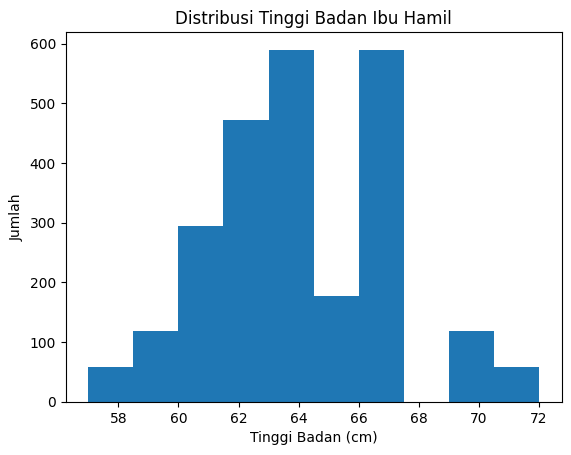

In [60]:
import matplotlib.pyplot as plt

plt.hist(merged_data['Tinggi_Badan_cm'], bins=10)
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Jumlah')
plt.title('Distribusi Tinggi Badan Ibu Hamil')
plt.show()


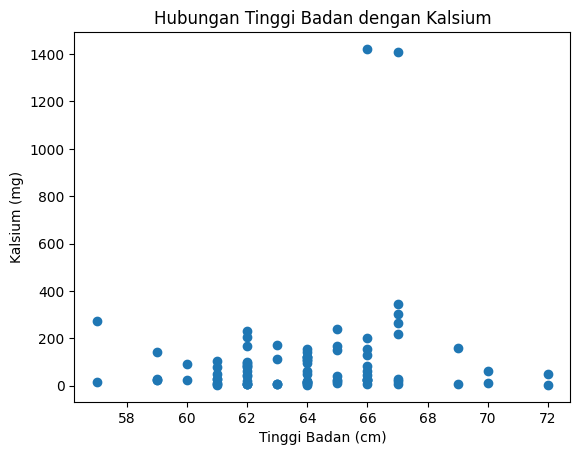

In [61]:
# Hubungan antara tinggi badan ibu hamil dan kandungan nutrisi

plt.scatter(merged_data['Tinggi_Badan_cm'], merged_data['Kalsium (mg)'])
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Kalsium (mg)')
plt.title('Hubungan Tinggi Badan dengan Kalsium')
plt.show()


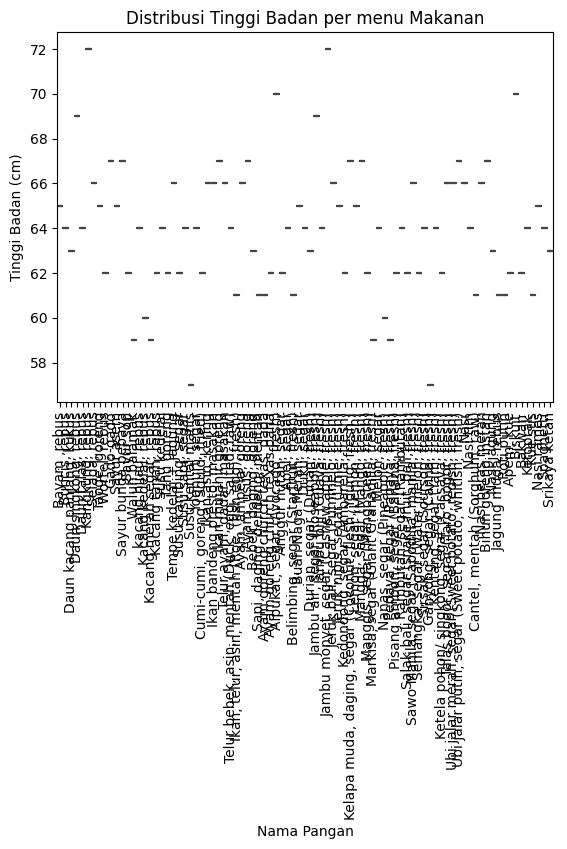

In [66]:
# distribusi Tinggi Badan (TB) berdasarkan menu makanan
import seaborn as sns

sns.boxplot(x=merged_data['Nama Pangan'], y=merged_data['Tinggi_Badan_cm'])
plt.xlabel('Nama Pangan')
plt.ylabel('Tinggi Badan (cm)')
plt.title('Distribusi Tinggi Badan per menu Makanan')
plt.xticks(rotation=90)
plt.show()



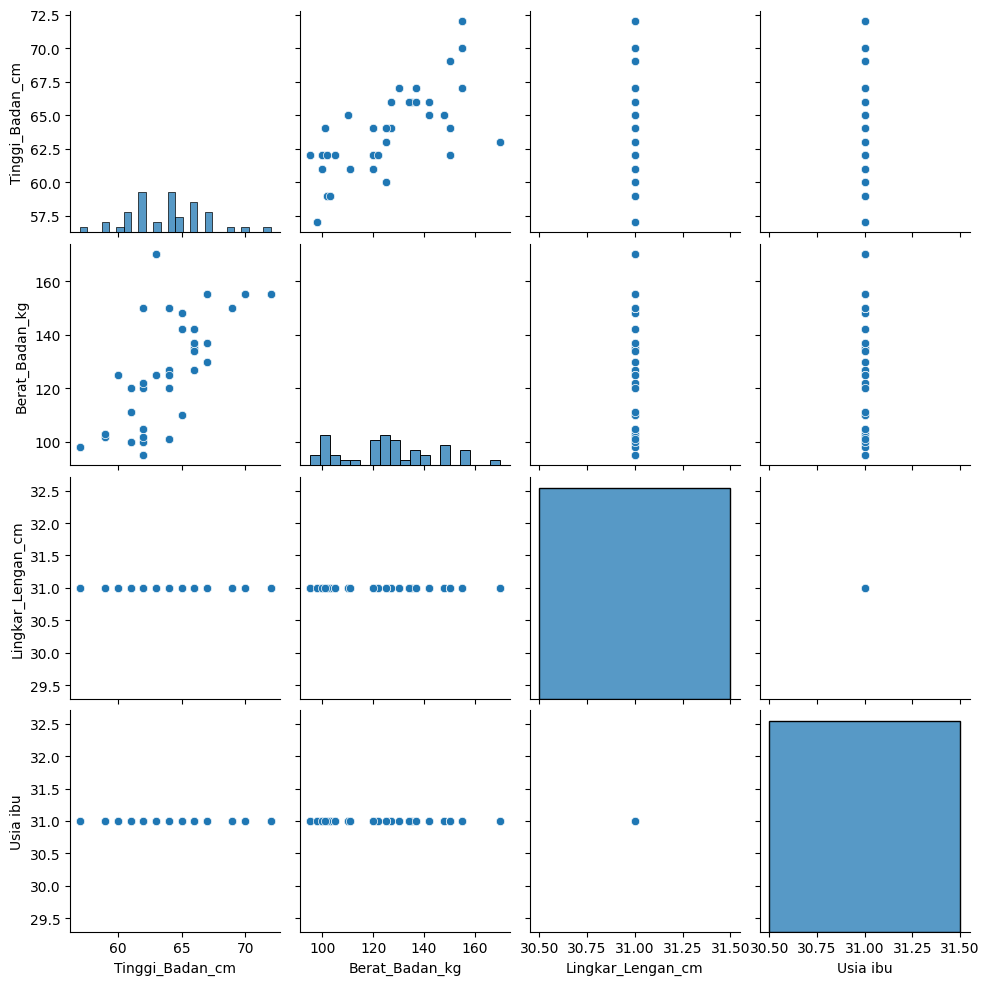

In [68]:
# korelasi antara Tinggi Badan (TB), Berat Badan (BB), dan Lingkar Lengan Atas


sns.pairplot(merged_data[['Tinggi_Badan_cm', 'Berat_Badan_kg', 
                          'Lingkar_Lengan_cm', 'Usia ibu']])
plt.show()


